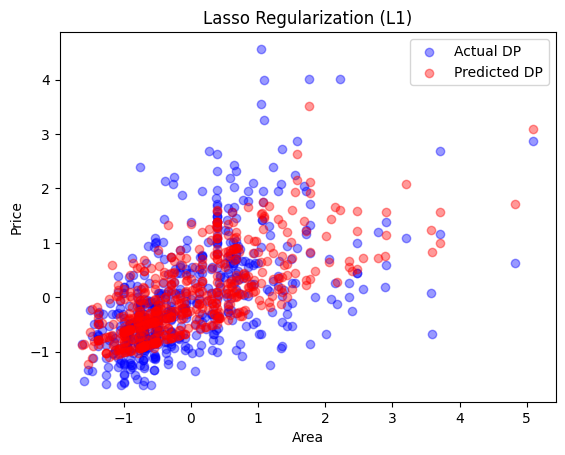

In [8]:
# Lasso Regression (L1) can be done by GD only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

csv = pd.read_csv('Housing.csv')
# print(csv.head())
x_pn = np.array(
    csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv['price'])

# applying z-score normalization
x = (x_pn-np.mean(x_pn, axis=0)) / np.std(x_pn, axis=0)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

def Lasso_GD(x,y,learning_rate,L,iteration):
    n=len(y)
    y=y.reshape(-1,1)
    X=np.c_[np.ones((n,1)),x]
    beta=np.zeros((X.shape[1],1))

    for _ in range(iteration):
        y_pred= X @ beta
        cf=y_pred - y
        # gradient
        dm=(1/n)*(X.T @ cf)
        z=beta-(learning_rate*dm)
        # soft thresolding
        beta = np.sign(z)*np.maximum(np.abs(z)-learning_rate*L, 0)
    
    # model prediction
    y_prediction= X @ beta

    # plotting
    plt.scatter(x[:,0],y,color='blue',alpha=0.4,label='Actual DP')
    plt.scatter(x[:,0],y_prediction,color='red',alpha=0.4,label='Predicted DP')
    plt.legend()
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Lasso Regularization (L1)')
    plt.show()
    

Lasso_GD(x,y,0.1,0.001,10000)



    
